In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [2]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r maker_passes
%store -r jacobs

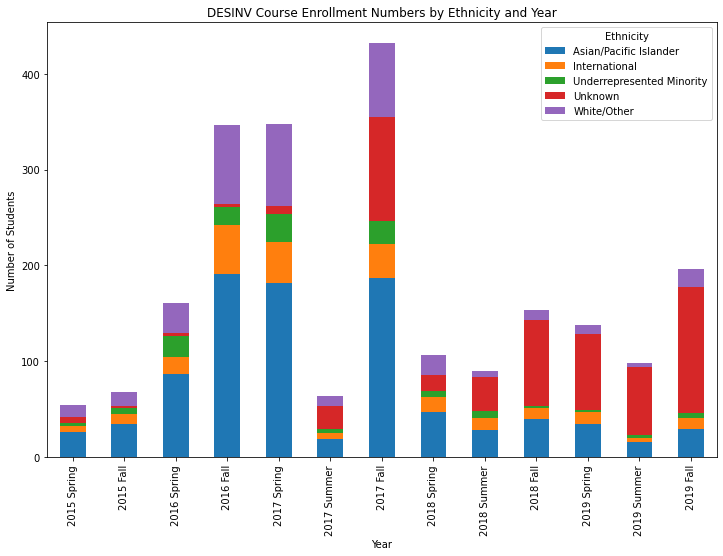

In [5]:
# stacked bar plot: DESINV Course Enrollment Numbers by Ethnicity and Year
jacobs_ethnicities = jacobs.merge(stem_paths[['ppsk', 'ethnic.l1']], on='ppsk', how='left')
jacobs_ethnicities['ethnic.l1'].fillna('Unknown', inplace=True)
#jacobs_ethnicities['year'] = jacobs_ethnicities['year.name'].str.split(" ", expand=True)[0]

jacobs_ethnicities = jacobs_ethnicities.rename({'ethnic.l1': "Ethnicity"}, axis=1)
jacobs_ethnicities['year'] = jacobs_ethnicities['year.name'].str.split(" ", expand=True)[0]
jacobs_ethnicities['term'] = jacobs_ethnicities['year.name'].str.split(" ", expand=True)[1]

cat_size_order = CategoricalDtype(['Spring', 'Summer', 'Fall'], ordered=True)
jacobs_ethnicities['term'] = jacobs_ethnicities['term'].astype(cat_size_order)
jacobs_ethnicities = jacobs_ethnicities.sort_values(['year','term', 'Ethnicity'])
jacobs_ethnicities.drop(['year','term'], axis=1, inplace=True)
jacobs_ethnicities['year.name'] = jacobs_ethnicities['year'].astype(str) + " " + jacobs_ethnicities['term'].astype(str)

'''
graph_data = jacobs_ethnicities.groupby(['year.name','Ethnicity'], sort=False).count().unstack()['ppsk']
graph_data.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='Year', ylabel='Number of Students', title='DESINV Course Enrollment Numbers by Ethnicity and Year')
'''

In [62]:
jacobs_ethnicities

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,Ethnicity
8,2015 Spring,1030081,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander
10,2015 Spring,1031223,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander
13,2015 Spring,1032550,Undergraduate,Engineering Science,Design Innovation,190,Primary,2,18406,18406.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander
14,2015 Spring,1032733,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander
17,2015 Spring,1171276,Undergraduate,Engineering Science,Design Innovation,190,Primary,1,18403,18403.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,2.0,Asian/Pacific Islander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,2019 Fall,2739108,Undergraduate,Design Innovation,Design Innovation,10,Primary,1,32998,32998.0,Discovering Design,A,Letter Grade,A-,3.7,2.0,White/Other
1873,2019 Fall,2739284,Undergraduate,Design Innovation,Design Innovation,10,Primary,1,32998,32998.0,Discovering Design,A,Letter Grade,A,4.0,2.0,White/Other
1876,2019 Fall,2741518,Undergraduate,Design Innovation,Design Innovation,22,Primary,1,28116,28116.0,Prototype & Fab,A,Letter Grade,A+,4.0,3.0,White/Other
1877,2019 Fall,2741518,Undergraduate,Design Innovation,Design Innovation,190,Primary,1,15094,1721.0,Spec Topics Des Inv,A,Letter Grade,A,4.0,3.0,White/Other


In [59]:
'''
fall2017 = jacobs_ethnicities[jacobs_ethnicities['year.name'] == '2017 Fall'].groupby(['course.number','Ethnicity']).count().unstack()['year.name'].fillna(0)
fall2017 = fall2017[fall2017.index.isin(['198','98','10', '15', '190'])].reindex(['198','98','10', '15', '190'])
fall2017.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='DESINV Course Number', ylabel='Number of Students', title='Fall 2017 DESINV Courses by Ethnicity')
'''

"\nfall2017 = jacobs_ethnicities[jacobs_ethnicities['year.name'] == '2017 Fall'].groupby(['course.number','Ethnicity']).count().unstack()['year.name'].fillna(0)\nfall2017 = fall2017[fall2017.index.isin(['198','98','10', '15', '190'])].reindex(['198','98','10', '15', '190'])\nfall2017.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='DESINV Course Number', ylabel='Number of Students', title='Fall 2017 DESINV Courses by Ethnicity')\n"